In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
auto_data_pro = pd.read_csv('../../datasets/auto_data_processed.csv')
auto_data_pro.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
141,2,122.0,volkswagen,gas,std,two,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,7975.0
105,0,89.0,subaru,gas,std,four,wagon,fwd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82.0,4800.0,28,32,7463.0
30,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0
22,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
6,0,188.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0


In [3]:
auto_subset = auto_data_pro[['horsepower', 'city-mpg', 
                             'highway-mpg', 'price']]

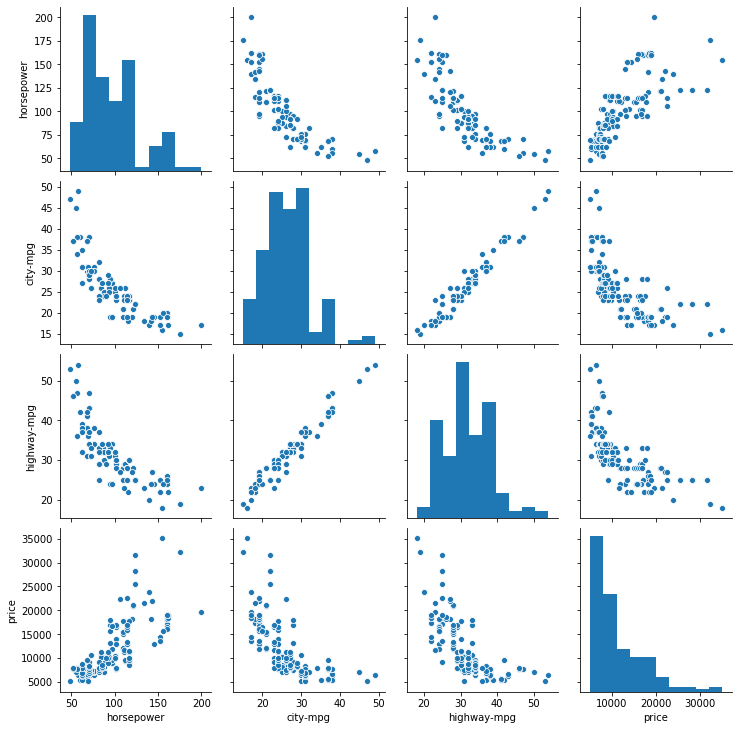

In [5]:
sns.pairplot(auto_subset)
plt.show()

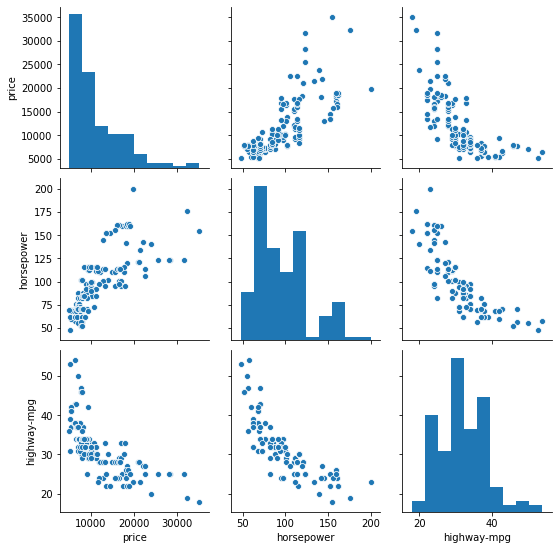

In [6]:
sns.pairplot(auto_data_pro,
             vars=['price', 'horsepower', 'highway-mpg'])

plt.show()

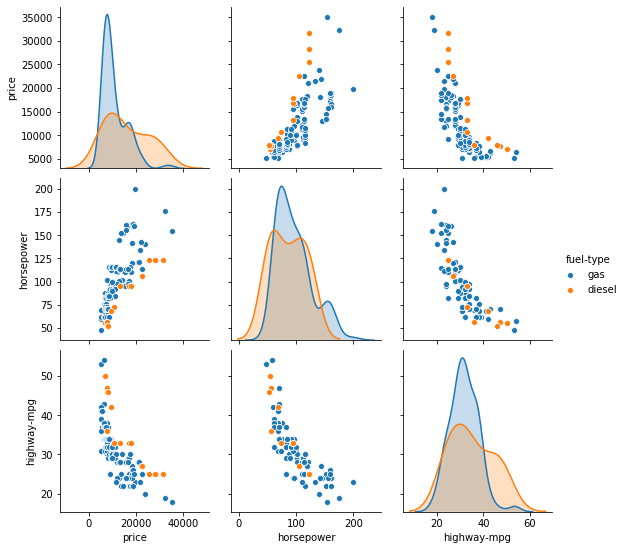

In [7]:
sns.pairplot(auto_data_pro,
             vars=['price', 'horsepower', 'highway-mpg'],
             hue='fuel-type')

plt.show()

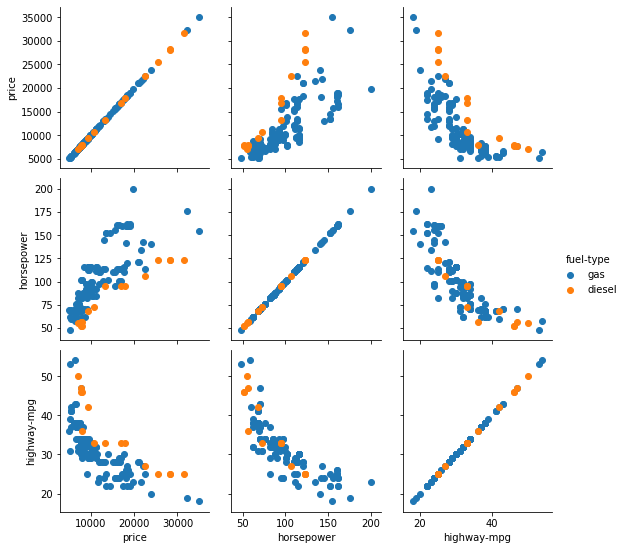

In [8]:
g = sns.PairGrid(auto_data_pro,
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')

g.map(plt.scatter)

g.add_legend()

plt.show()

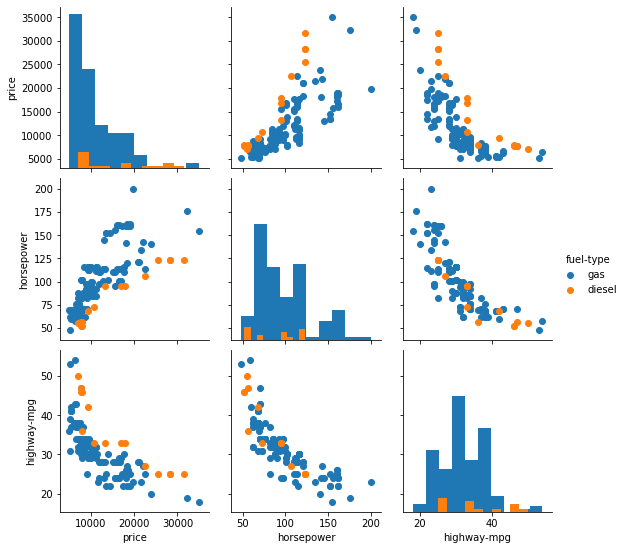

In [9]:
g = sns.PairGrid(auto_data_pro,
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')

g.map_diag(plt.hist)

g.map_offdiag(plt.scatter)

g.add_legend()

plt.show()

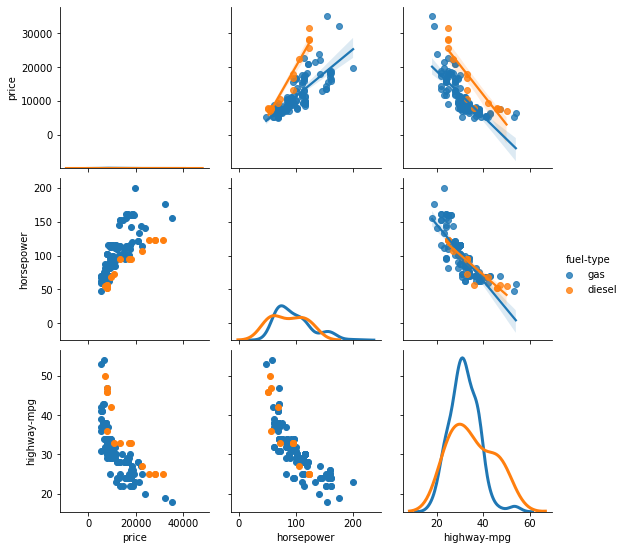

In [10]:
g = sns.PairGrid(auto_data_pro,
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')

g.map_lower(plt.scatter)

g.map_diag(sns.kdeplot, lw=3, legend=False)

g.map_upper(sns.regplot)

g.add_legend()

plt.show()

In [11]:
auto_corr = auto_data_pro[['engine-size', 'horsepower', 
                           'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].corr()

auto_corr

,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-size,1.000000,0.812073,-0.284686,-0.699139,-0.714095,0.841496
horsepower,0.812073,1.000000,0.074057,-0.837214,-0.827941,0.759874
peak-rpm,-0.284686,0.074057,1.000000,-0.052929,-0.032777,-0.171916
city-mpg,-0.699139,-0.837214,-0.052929,1.000000,0.971999,-0.692273
highway-mpg,-0.714095,-0.827941,-0.032777,0.971999,1.000000,-0.720090
price,0.841496,0.759874,-0.171916,-0.692273,-0.720090,1.000000


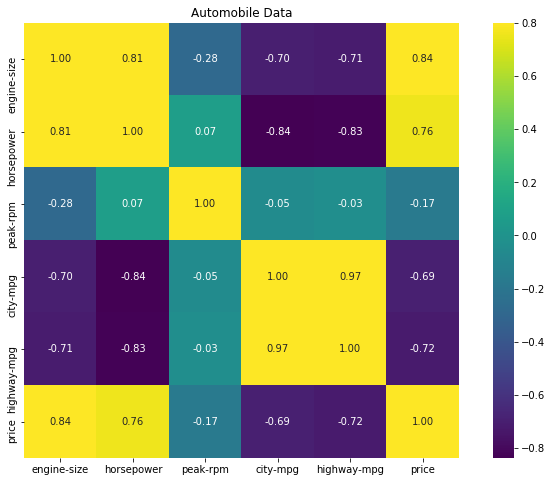

In [12]:
plt.figure(figsize=(12,8))

sns.heatmap(auto_corr, vmax=.8, square=True,
            annot=True, fmt='.2f', cmap='viridis')

plt.title('Automobile Data')

plt.show()